In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import re
import operator
macbeth = requests.get('http://www.gutenberg.org/cache/epub/2264/pg2264.txt').text
# function to clean text
def cleanup(string):
    res = re.split('; |, |\*|\n|\r',string)
    wordslist=[]
    for i in res:
        for word in i.split(' '):
            if word != ' ' and word != '':
                wordslist.append(str(word.upper()))
    return wordslist    
#takes in words finds unique words in words then scores the words based on amount of uses
def mostcommon(words):
    unique_words = list(set(words))
    word_hist = {}
    for word in unique_words:
        word_hist[word] = 0
    for word in words:
        word_hist[word] += 1
    return word_hist
#outputs true or false depending on if a word is that of a character name
def ischaracter(word):
    if word.endswith('.'):
        return True
    else:
        return False
#returns all the words that are possibly characters
def characterlines(cleanwords):    
    return list(filter(lambda x: ischaracter(x), cleanwords))





In [3]:
#make a list that is the result of our clean up function
cleanwords = cleanup(macbeth)
#in our new list we know the first 2668 entries arent part of the play so we can start from there
cleanwords = cleanwords[2668:]
#list of words that are possible characters
characters = characterlines(cleanwords)


In [4]:
#using our the output of our most common variables function make a dictionary that stores its output
hist = mostcommon(cleanwords)
#same thing but for most common characters
mostcommoncharacters = mostcommon(characters)

In [5]:
#using our newly made unsorted dictionaries sort them using sorted(d.items,key = operator.itemgetter(1), reverse=true)
sor = sorted(hist.items(), key = operator.itemgetter(1), reverse=True)
#same thing as above but for character
sorchar = sorted(mostcommoncharacters.items(), key=operator.itemgetter(1), reverse=True)


In [6]:
#the output of the sort function will be a tuple of the key and its value so...
values = [i[1] for i in sor]#new variable that takes the second" value" for every item in a for loop
cvalues = [i[1] for i in sorchar]#same for character
#then again for the 'key portion of said tuple'
orderdwords = [i[0] for i in sor]
corderdwords = [i[0] for i in sorchar]

In [7]:
#of our new key value lists we only need the first 25 so we can index them
values25 = values[0:24]
cvalues25 = cvalues[0:24]

orderdwords25 = orderdwords[0:24]
corderdwords25 = corderdwords[0:24]

No handles with labels found to put in legend.


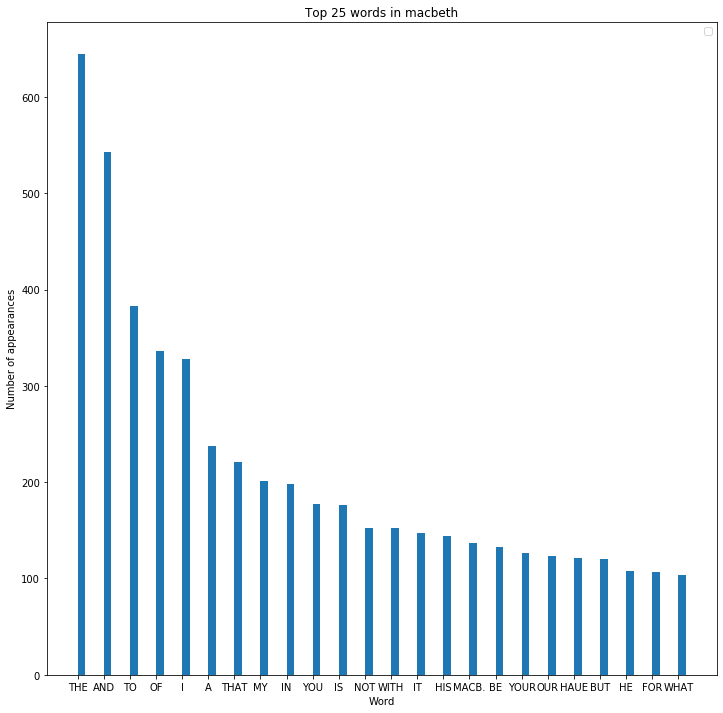

In [12]:
#now we can plot most common words
plt.figure(figsize=(12,12))
plt.bar(orderdwords25, values25, align='edge', width=0.3)
plt.ylabel('Number of appearances')
plt.xlabel('Word')
plt.title('Top 25 words in macbeth')
plt.show()

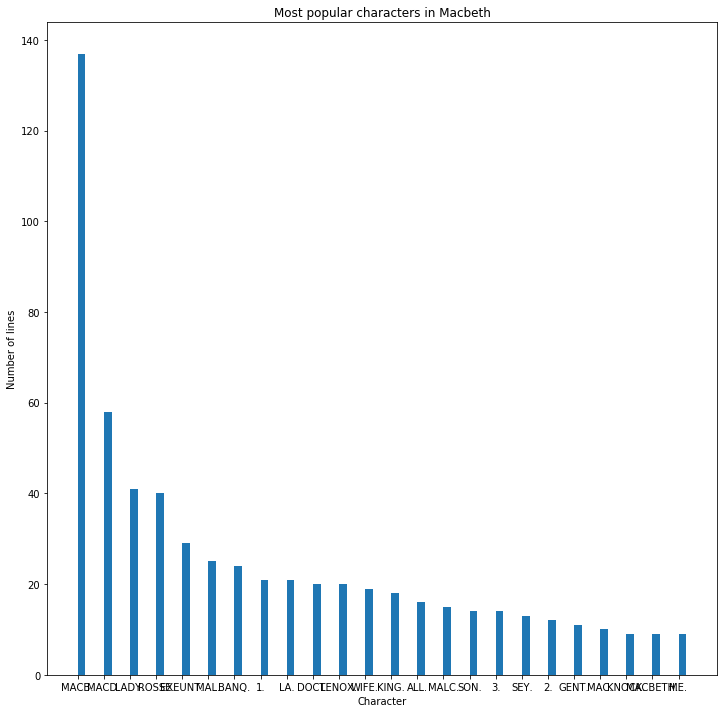

In [14]:
#and most common characters
plt.figure(figsize=(12,12))
plt.bar(corderdwords25, cvalues25, align='edge', width=0.3)
plt.xlabel('Character')
plt.ylabel('Number of lines')
plt.title('Most popular characters in Macbeth')
plt.show()